# List 5

In [240]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import plotly.graph_objects as go

## Exercício 1

Considerar o problema de interpolação com polinômios de grau 𝑛 = 2, que passam por 𝑛+1 = 3 pontos {(𝑥0, 𝑦0), (𝑥1, 𝑦1), (𝑥2, 𝑦2)}, usando as funções 𝜙𝑖(𝑥), 𝑖 = 0, 1, 2: 

$$\begin{cases}\phi_0(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}\\
               \phi_1(x) = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}\\
               \phi_2(x) = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{cases}$$

Encontrar os coeficientes do polinômio: 

$$p(x) = \sum²_{i=0}c_1 \phi_i (x)$$

E dar a solução do mesmo. Qual seria a vantagem de usar este tipo de base de funções (polinômios de Lagrange) para o espaço dos polinômios.


In [241]:
def CalcPhi(x, listX):
    phi_0 = ((x-listX[1])*(x-listX[2]))/((listX[0]-listX[1])*(listX[0]-listX[2]))
    phi_1 = ((x-listX[0])*(x-listX[2]))/((listX[1]-listX[0])*(listX[1]-listX[2]))
    phi_2 = ((x-listX[0])*(x-listX[1]))/((listX[2]-listX[0])*(listX[2]-listX[1]))

    return phi_0, phi_1, phi_2

In [242]:
def Interpol_1(x, y):
    x0 = CalcPhi(x[0], x)
    x1 = CalcPhi(x[1], x)
    x2 = CalcPhi(x[2], x)

    A = np.matrix([[x0[0], x0[1], x0[2]], [x1[0], x1[1], x1[2]], [x2[0], x2[1], x2[2]]])
    C = np.linalg.solve(A, y)
    print("Matriz A:\n", A, "\n")
    return C

$$v(x)=c_0*1+c_1*x+...+c_n*x^n$$

In [243]:
def Solution(x, listPhi, C, size):
     
    v = 0

    for i in range(size):
        v += C[i]*listPhi[i]

    return v

In [244]:
# CALCULO DOS COEFICIENTES

pontosX = [2, 6, 4]         # x0, x1, x2
pontosY = [14, 24, 25]      # y0, y1, y2

C = Interpol_1(pontosX, pontosY)
print(C)

Matriz A:
 [[ 1.  0. -0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]] 

[14. 24. 25.]


In [245]:
# ENCONTRANDO SOLUÇÃO

x = 2                   # Número qualquer
size = len(pontosX)

listPhi = CalcPhi(x, pontosX)
V = Solution(x, listPhi, C, size)
print(V)

14.0


## Exercício 2

Modificar o exemplo fornecido e calcular o polinomio cúbico por partes para a função de Runge 𝑅(𝑥). Considerar outros conjuntos de pontos, inclusive conjuntos que não estejam uniformemente distribuídos no intervalo de interesse.

In [246]:
# FUNÇÃO RUNGE
def R(x):
    return 1.0/(1.0 + 25.0*x**2)

# CALCULAR A FUNÇÃO E PLOTAR O GRÁFICO
# REQUER O TIPO PARA USAR NO INTERP1D
def CalculateAndPlot(boundarie, pointsX, pointsY, type):
    
    # Define a set of points to evaluate the functions
    xeval = np.linspace(-boundarie, boundarie, 40000)
    yeval = R(xeval)

    # Compute the piecewise liner polynomial
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
    ylin = interp1d(pointsX, pointsY, kind=type)

    # Plot everything
    plt.plot(pointsX, pointsY, 'ob',
    xeval, yeval, '-r',
    xeval, ylin(xeval), '-g')

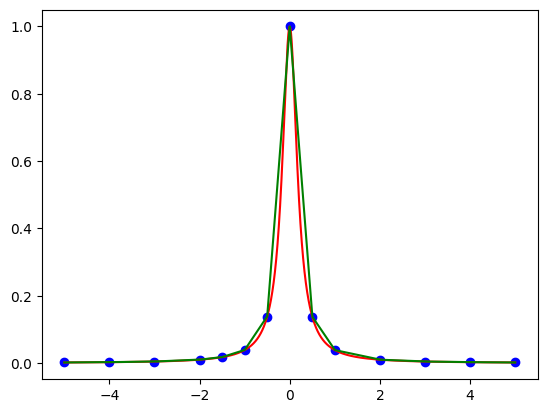

In [247]:
# EXEMPLO ORIGINAL

x1 = np.array([-5, -4, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 2, 3, 4, 5])
y1 = R(x1)

# OUTRO EXEMPLO

x2 = np.array([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
y2 = R(x2)

# PLOTAGEM

CalculateAndPlot(5, x1, y1, 'linear')

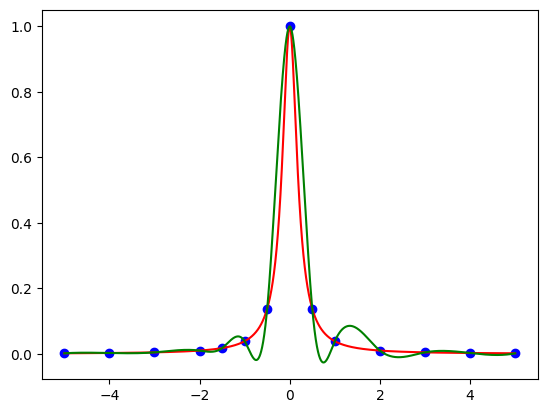

In [248]:
CalculateAndPlot(5, x1, y1, 'cubic')

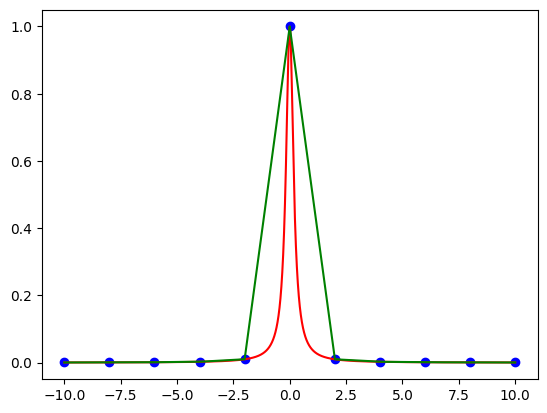

In [249]:
CalculateAndPlot(10, x2, y2, 'linear')

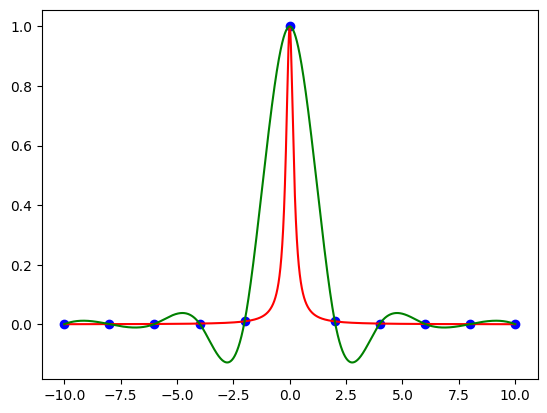

In [250]:
CalculateAndPlot(10, x2, y2, 'cubic')

## Exercício 3

Mostrar que de fato vale a relação que aparece na Eq. 5.1, i.e.,

$$\nabla \Phi(c)=A^T(Ac-y)$$

$$r(c)=Ac-y \Rightarrow r(c)=\begin{pmatrix}x_0 & x_0² & ... & x_0^m \\ x_1 & x_1² & ... & x_1^m \\ ... & ... & ... & ... \\ x_n & x_n² & ... & x_n^m\end{pmatrix} * \begin{pmatrix}C_0 \\ C_1 \\ ... \\ C_n\end{pmatrix} - \begin{pmatrix}Y_0 \\ Y_1 \\ ... \\ Y_m\end{pmatrix} = \begin{pmatrix}p(x_0)-Y_0 \\ p(x_1)-Y_1 \\ ... \\p(x_n)-Y_n\end{pmatrix}$$ 

Aplicando a transversa $A^t$ dos dois lados:

$$A^t * r(c)=\begin{pmatrix}\sum x_i r_i \\ \sum x_i² r_i²\\ ... \\ \sum x_i^m r_i^m\end{pmatrix}$$

## Exercício 4

Considerar o arquivo data.txt disponível no Tidia, o qual disponibiliza dados experimentais. Queremos estudar possíveis relações entre os dados que aparecem nas diversas colunas desse arquivo. Fazer um código de python que carrega o arquivo e aplica o método das equações normais para estabelecer qual é a melhor relação entre os dados (no sentido dos quadradros mínimos), considerando as seguintes possibilidades:

- $c_{(3)} \approx k_1 + k_2 c_{(1)} $
- $c_{(3)} \approx k_1 + k_2 c_{(1)} + k_3 c_{(1)}^{2} $
- $c_{(4)} \approx k_1 + k_2 c_{(1)} + k_3 c_{(2)} $

Fazer gráficos mostrando os resultados. Notar que para mostrar o gráfico do polinômio que aproxima os dados em cada caso será necessário avaliar ele em vários pontos no intervalo de interesse, para isto, pode usar por exemplo a função polyval.

In [251]:
# CARREGAR DADOS DO ARQUIVO

arquivo = open("Docs/data.txt", "r")
data = arquivo.read().split("\n")

# CONSTS
c1 = []
c2 = []
c3 = []
c4 = []

# SPLITING VALUES

for i in range(len(data)-1):

    dataSplit = data[i].split()
    
    c1.append(float(dataSplit[0]))
    c2.append(float(dataSplit[1]))
    c3.append(float(dataSplit[2]))
    c4.append(float(dataSplit[3]))

arquivo.close()


### Caso 1: $c_3 \approx k_1 + k_2c_1$

$Ac = y \Rightarrow \begin{pmatrix} k_{1_i} & k_{2_i}c_{1_i}\end{pmatrix} = \begin{pmatrix}c_{3_i}\end{pmatrix}$

$B = A^t A$

$Bc = A^t y$

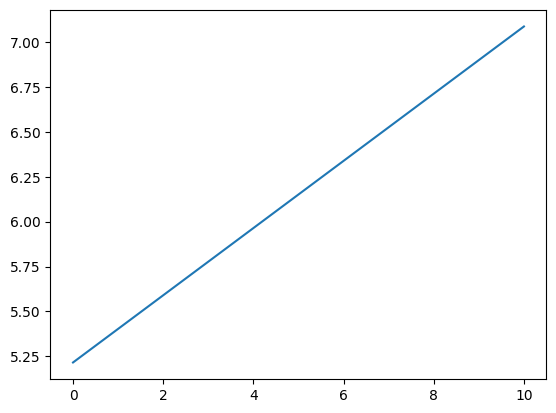

In [252]:
# TESTING VALUES - Montando caso 1: c_3 approx k1 + k2c_1
A = np.zeros(shape=(100,2))
At = np.zeros(shape=(100,2))
A[:, 0] = 1
A[:, 1] = c1

# B = A^t @ A => matriz quadrada 
A_t=np.transpose(A)
B=A_t@A

# A^t Ac = A^t y -> Bc = A^t @ y
y = np.zeros(shape=(100,1))
y[:,0] = c3

# Descobrindo a 'matriz' de coeficientes da equação polinomial de grau 1
c = np.linalg.solve(B,(A_t@y))

# Avaliando em diversos pontos
x_graph = np.linspace(0, 10, 1000)
y_graph = np.polyval(c, x_graph)

plt.plot(x_graph, y_graph)

No caso 1 é observado a dependência apenas de uma variável e com apena 2 termos, isso nos garante que será uma função linear no plano, como mostrado no gráfico acima.

### Caso 2: $c_3 \approx k_1 + k_2c_1 + k_3c_1²$

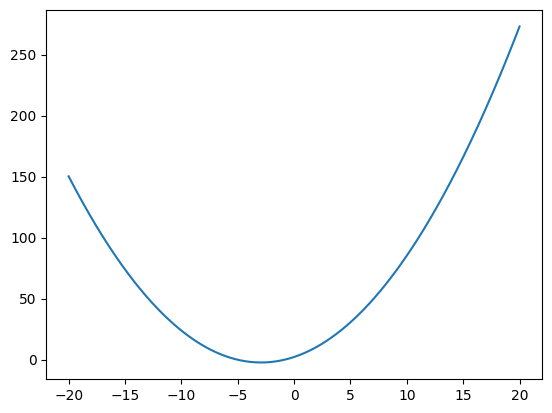

In [253]:
A = np.zeros(shape=(100,3))
At = np.zeros(shape=(100,3))
A[:, 0] = 1
A[:, 1] = c1

for i in range(len(data)-1):
    A[i][2] = (float(c1[i]))**2

# B = A^t @ A => matriz quadrada 
A_t=np.transpose(A)
B=A_t@A

# A^t Ac = A^t y -> Bc = A^t @ y
y = np.zeros(shape=(100,1))
y[:,0] = c3

# Descobrindo a 'matriz' de coeficientes dos polinômios
c = np.linalg.solve(B,(A_t@y))

# Avaliando em diversos pontos
x_graph = np.linspace(-20, 20, 1000)
y_graph = np.polyval(c, x_graph)

plt.plot(x_graph, y_graph)

Aqui temos uma função de 2° grau isso devido a quantidade de termos que, em relação ao primeiro caso, possui um a mais. Ainda é dependente de apenas uma variável e por isso também é plotada no plano.

### Caso 3: $c_4 \approx k_1 + k_2c_1 + k_3c_2$

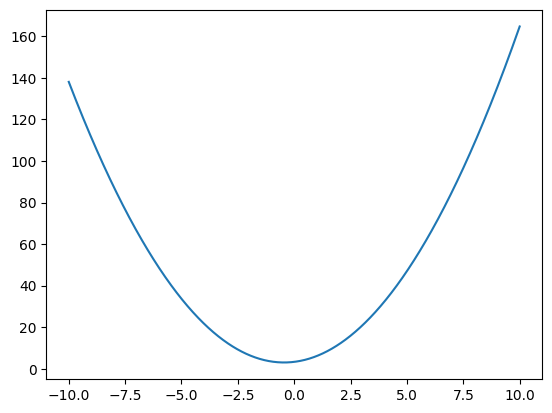

In [254]:
# TESTING VALUES - Montando caso 1: c_4 approx k1 + k2c_1 + k3c_2

A = np.zeros(shape=(100,3))
At = np.zeros(shape=(100,3))
A[:, 0] = 1
A[:, 1] = c1
A[:, 2] = c2

# B = A^t @ A => matriz quadrada 
A_t=np.transpose(A)
B=A_t@A

# A^t Ac = A^t y -> Bc = A^t @ y
y = np.zeros(shape=(100,1))
y[:,0] = c4

# Descobrindo a 'matriz' de coeficientes dos polinômios
c = np.linalg.solve(B,(A_t@y))

# Avaliando em diversos pontos
x_graph = np.linspace(-10, 10, 1000)
y_graph = np.polyval(c, x_graph)

plt.plot(x_graph, y_graph)

Nota-se que o tipo de função irá depender da quantidade de termos de cada possibilidade. Isso porque ao montar a matriz $A$, ela será interpretada da seguinte maneira: 

$$A = \begin{pmatrix}1 & x_0¹ & x_0² & ... & x_0^n \\ 1 & x_1¹ & x_1² & ... & x_1^n  \\ ... & ... & ... & ... & ... \end{pmatrix}$$

E seguindo assim para $n$ termos. Então para uma possiblidade de 4 termos, independente dos coeficientes teríamos uma função cúbica.

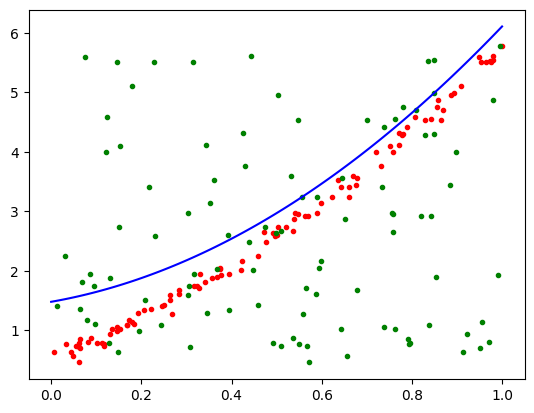

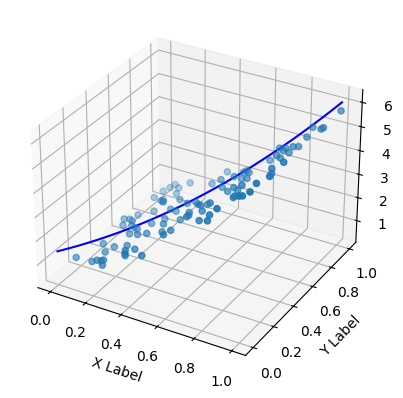

In [255]:
x = y = np.linspace(0, 1, 100)

coef = [c[2], c[1],c[0]]
z = np.polyval(coef, x)

plt.plot(c1, c3, '.r')
plt.plot(c2, c3, '.g') 
plt.plot(x, z, '-b')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(c1, c2, c3)
ax.plot(x,y,z,'-b')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Nesse último caso notamos que por trer três termos ainda é a projeção de uma função quadrática, mas sua dependência de duas variáveis configura uma função f(x,y) que pode ser plotada no espaço.

## Exercício 5

Considerar a seguinte integral:

$$\int_0^1 \frac{4}{1+x^{2}} \,dx= 4a*\tan(x)\Big|_0^1 = \pi$$

Usando as diferentes regras compostas de Newton-Cotes vistas, calcular o valor numérico da integral e calcular o erro do resultado (i.e., e = |valor exato − valor numérico|). Plotar esse erro como função do número de subintervalos usando a função loglog para plotar em papel logarítmico. Que conclusões pode tirar?

$\text{Sendo: }\begin{cases}x_k = a+kh\\ \overline x_k = \frac{x_{k-1}, x_k}{2}\end{cases}$

$\boxed{\text{Utilizando Regra do Ponto Médio}}$

$\int^a_b f(x)\; dx = h*\sum^n_{k=1} f(\overline x_k)$

$\boxed{\text{Utilizando Regra do Trapézio}}$

$\int^a_b f(x)\; dx = \frac{h}{2}*\sum^n_{k=1} \left[f(x_{k-1})+f(\overline x_k)\right]$

$\boxed{\text{Utilizando Regra de Simpson}}$

$\int^a_b f(x)\; dx = \frac{h}{6}*\sum^n_{k=1} \left[f(x_{k-1})+4*f(\overline x_k) + f(x_k)\right]$

In [256]:
def CalcMedia(x1, x2):
    return (x1+x2)/2

def CalcFunc(x):
    return (4/(1+x**2))

def CalcInt(a, b, n_list, function):

    _rMedio = []
    _rTrapezio = []
    _rSimpson = []
    x = 0

    for n in n_list:
        h = (b-a)/n
        x = a + np.arange(1, n+1) * h
        xk = CalcMedia(x - h, x)

        rMedio = h * sum(function(xk))
        rTrapezio = h/2 * sum(function(x-h) + function(xk)) 
        rSimpson = h/6 * sum((function(x-h) + 4*function(xk) + function(x)))

        _rMedio.append(rMedio)
        _rTrapezio.append(rTrapezio)
        _rSimpson.append(rSimpson)


    return _rMedio, _rTrapezio, _rSimpson

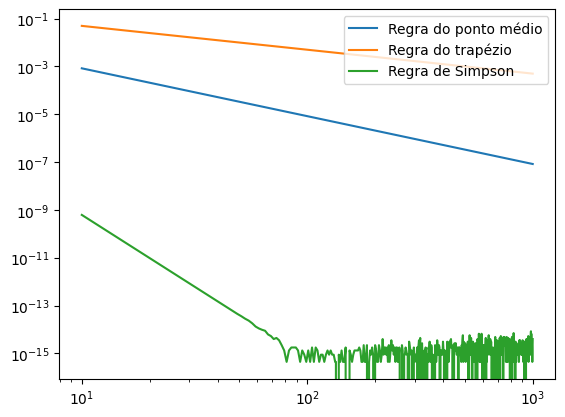

In [257]:
a = 0
b = 1
i = 0
n = np.linspace(10, 10**3, 500, dtype=int)

erroPontoMedio, erroTrapezio, erroSimpson = CalcInt(a, b, n, CalcFunc)

for i in range(len(n)):
    erroPontoMedio[i] = abs(np.pi - erroPontoMedio[i])
    erroTrapezio[i] = abs(np.pi - erroTrapezio[i])
    erroSimpson[i] = abs(np.pi - erroSimpson[i])

plt.loglog(n, erroPontoMedio)
plt.loglog(n, erroTrapezio)
plt.loglog(n, erroSimpson)

plt.legend(["Regra do ponto médio", "Regra do trapézio", "Regra de Simpson"], loc="upper right")
plt.show()

# Exercício 6

Considerar as redes hidráulicas estudadas anteriormente, para o qual foi desenvolvida a função SolveNetwork() e a função que calcula a potência consumida pela bomba. Considerar uma rede com os seguintes parâmetros:
- n = 8
- m = 9
- QB = 3
- natm = n*m - 1
- nB = 0

As condutâncias dependem de um parâmetro:

$$\begin{cases}CH = 2.3 + 10e^{-(x-5)²}\\ CV =1.8 + 10e^{-(x-5)²}\end{cases}$$

Calcular a integral da potencia no intervalo 1 ≤ x ≤ 10 usando a regra do ponto médio, do trapezio e de Simpson compostas considerando 2, 4, 6, 8, 10 intervalos. Organizar os resultados numa tabela.

### Funções Utilizadas na Lista 2

In [258]:
# GERA REDE E RESOLUÇÃO

def GeraRede(nx,ny, X):
    nv = nx*ny
    nc = (nx-1)*ny + (ny-1)*nx
    
    coord = np.zeros(shape=(nv,2))

    for i in range(nx):
        for j in range(ny):
            ig = i + j*nx
            coord[ig,0] = i
            coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx-1):
            k = j*(nx-1) + i
            conec[k,0] = j*nx + i
            conec[k,1] = j*nx + i+1
            #C[k] = CH
            C[k] = 2.3 + 10*pow(math.e, -pow(X - 5, 2))
            

    # Loop sobre canos verticais
    for i in range(nx):
        for j in range(ny-1):
            k = (nx-1)*ny + j*nx + i
            conec[k,0] = i + j*nx
            conec[k,1] = i + (j+1)*nx
            #C[k] = CV
            C[k] = 1.8 + 10*pow(math.e, -pow(X - 5, 2))

    return nv, nc, conec, C, coord

def Assembly(conec, C, nv, nc):
    A = np.zeros(shape=(nv,nv))
    for k in range(nc):
        n1 = conec[k,0]
        n2 = conec[k,1]

        A[n1,n2] += -C[k]
        A[n2,n1] += -C[k]
        A[n1,n1] += C[k] 
        A[n2,n2] += C[k]
    
    return A

def SolveNetwork(conec, C, natm, nB, QB, nv, nc):
    Atilde = Assembly(conec, C, nv, nc)
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1
    
    b = np.zeros(shape=nv)
    b[nB] = QB
    pressure = np.linalg.solve(Atilde, b)
    return pressure

def GetDK(conec, C, nv, nc):
    K = np.zeros(shape=(nc,nc))
    D = np.zeros(shape=(nc,nv))
    
    for i in range(nc):                 # Coloca valor em todas as diagonais
        K[i,i] = C[i]

    for k in range(nc):                 # Ajuste dos indexes
        n1 = conec[k,0]
        n2 = conec[k,1]
        D[k,n1] = 1
        D[k,n2] = -1 

    return K, D

def CalculaPotencia(conec, P, C, nv, nc):

   K, D = GetDK(conec, C, nv, nc)
   return (np.transpose(P) @ (np.transpose(D) @ K @ D) @ P)



### Para Esse exercício

In [259]:
def CalcPot(X):
    n, m = 8, 9
    QB = 3
    nAtm = n*m - 1
    nB = 0
    
    W = []

    for x in X:
        
        nv, nc, conec, C, coord = GeraRede(n, m, x)
        P = SolveNetwork(conec, C, nAtm, nB, QB, nv, nc)
        W.append(CalculaPotencia(conec, P, C, nv, nc)) 
        
    return np.array(W)

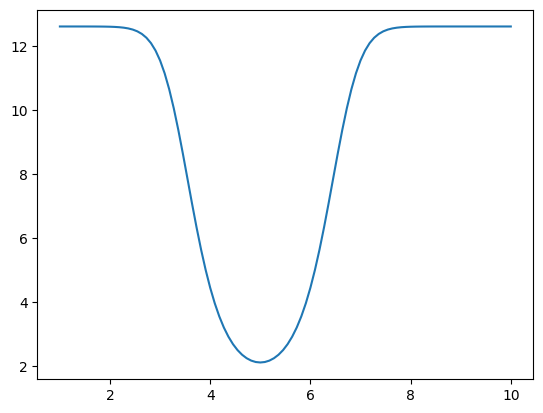

In [260]:
div = np.linspace(1, 10, 100)
P = CalcPot(div)
plt.plot(div, P)
plt.show()

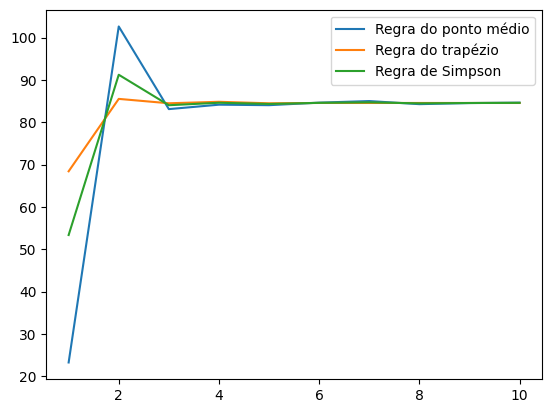

In [261]:
a = 1
b = 10

n = np.linspace(1, 10, 10)


_pMedio, _pTrapezio, _pSimpson = CalcInt(a, b, n, CalcPot)

plt.plot(n, _pMedio)
plt.plot(n, _pTrapezio)
plt.plot(n, _pSimpson)

plt.legend(["Regra do ponto médio", "Regra do trapézio", "Regra de Simpson"], loc="upper right")
plt.show()

In [295]:
def CalcInt_Uni(a, b, n_list, function):

    x = 0

    for n in n_list:
        h = (b-a)/n
        x = a + np.arange(1, n+1) * h
        xk = CalcMedia(x - h, x)

        rMedio = h * sum(function(xk))
        rTrapezio = h/2 * sum(function(x-h) + function(xk)) 
        rSimpson = h/6 * sum((function(x-h) + 4*function(xk) + function(x)))

    return rMedio, rTrapezio, rSimpson

In [296]:
a = 1
b = 10
_pMedio2, _pTrapezio2, _pSimpson2 = np.round(CalcInt_Uni(a, b, np.linspace(1, 10, 2), CalcPot), 3)
_pMedio4, _pTrapezio4, _pSimpson4 = np.round(CalcInt_Uni(a, b, np.linspace(1, 10, 4), CalcPot), 3)
_pMedio6, _pTrapezio6, _pSimpson6 = np.round(CalcInt_Uni(a, b, np.linspace(1, 10, 6), CalcPot), 3)
_pMedio8, _pTrapezio8, _pSimpson8 = np.round(CalcInt_Uni(a, b, np.linspace(1, 10, 8), CalcPot), 3)
_pMedio10, _pTrapezio10, _pSimpson10 = np.round(CalcInt_Uni(a, b, np.linspace(1, 10, 10), CalcPot), 3)

In [305]:
fig = go.Figure(data=[go.Table(header=dict(values=['', '2 Intervalos', '4 Intervalos', '6 Intervalos', '8 Intervalos', '10 Intervalos']),
                               cells=dict(values=[['Ponto Medio', 'Regra do Trapezio', 'Simpson'], [_pMedio2, _pTrapezio2, _pSimpson2], 
                                                  [_pMedio4, _pTrapezio4, _pSimpson4], [_pMedio6, _pTrapezio6, _pSimpson6], 
                                                  [_pMedio8, _pTrapezio8, _pSimpson8], [_pMedio10, _pTrapezio10, _pSimpson10]]))])

fig.update_layout(width=1000, height=300)
fig.show()

# Exercício 7

No exercício anterior, calcular a derivada de função da potência consumida pela bomba como função de  usando a regras de diferenciação numérica centrada. Plotar o resultado.

In [264]:
def CalcPot(X):
    n, m = 8, 9
    QB = 3
    nAtm = n*m - 1
    nB = 0
    
    W = []

    for x in X:
        
        nv, nc, conec, C, coord = GeraRede(n, m, x)
        P = SolveNetwork(conec, C, nAtm, nB, QB, nv, nc)
        W.append(CalculaPotencia(conec, P, C, nv, nc)) 
        
    return np.array(W)

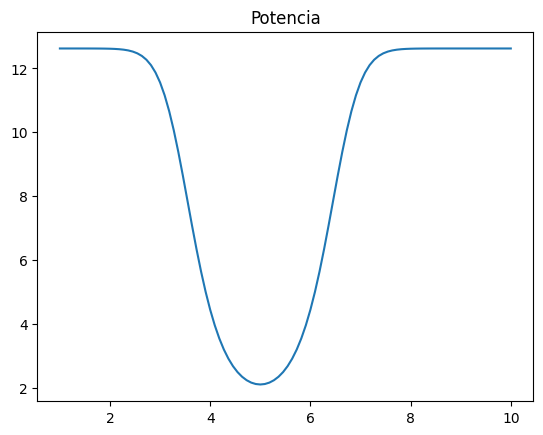

In [265]:
h = np.linspace(1, 10, 100)
plt.plot(div, CalcPot(h))
plt.title("Potencia")
plt.show()

In [266]:
def Derivadas(x, funcao, dist):
    resF = (funcao(x + dist) - funcao(x))/dist
    resB = (funcao(x) - funcao(x - dist))/dist
    resC = (funcao(x + dist) - funcao(x - dist))/(2*dist)

    return resF, resB, resC

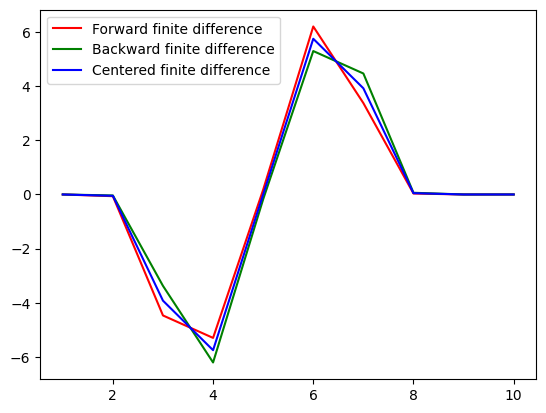

In [267]:
x = np.linspace(1, 10, 10)
dist = 1e-1

resF, resB, resC = Derivadas(x, CalcPot, dist)

plt.plot(x, resF, "-r", label="Forward finite difference")
plt.plot(x, resB, "-g", label="Backward finite difference")
plt.plot(x, resC, "-b", label="Centered finite difference")
plt.legend()
plt.show()

# Exercício 8

Considerar a função de uma variável:

$$f(x)=xe^{-x}\cos(2x)$$

In [268]:
def Func(x):
    return (x * pow(math.e, -x) * math.cos(2*x))

### a) 

Calcular a derivada primeira $f'$ exata e plotar no intervalo $[0, \pi]$.

In [269]:
def Der(x):
    return ((1-x) * math.cos(2*x) - 2*x*math.sin(2*x)) / (math.e**x)

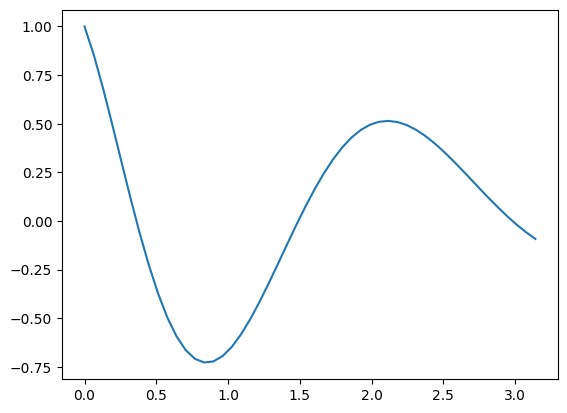

In [270]:
X = np.linspace(0, np.pi)
der = []

for x in X:
    der.append(Der(x))

plt.plot(X, der)
plt.show()

### b)

Usando as fórmulas de diferenciação numérica, calcular a derivada $f'_a$ (aproximada) e plotar como função de $x$ no intervalo $[0, \pi]$. Usar valores de $\delta$ = 0.2, 0.1, 0.05 e 0.025.

In [271]:
def Cal_Der(x, funcao, dist):
    resF = (funcao(x + dist) - funcao(x))/dist
    resB = (funcao(x) - funcao(x - dist))/dist
    resC = (funcao(x + dist) - funcao(x - dist))/(2*dist)

    return resF, resB, resC

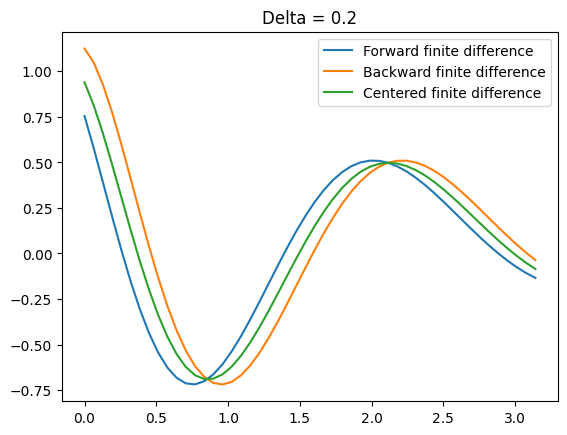

In [272]:
X = np.linspace(0, np.pi)
delta = 0.2
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, Func, delta)
    derF.append(f)
    derB.append(b)
    derC.append(c)

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.2")
plt.show()

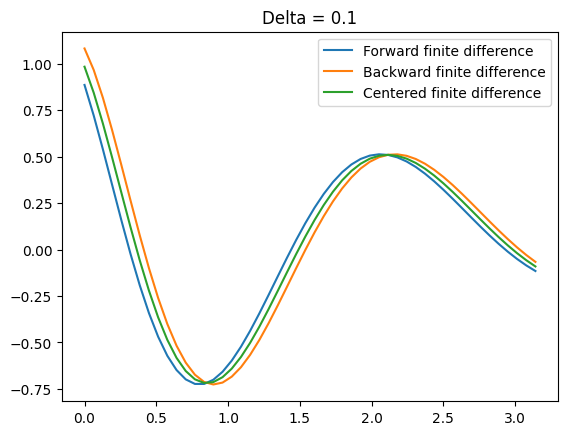

In [273]:
X = np.linspace(0, np.pi)
delta = 0.1
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, Func, delta)
    derF.append(f)
    derB.append(b)
    derC.append(c)

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.1")
plt.show()

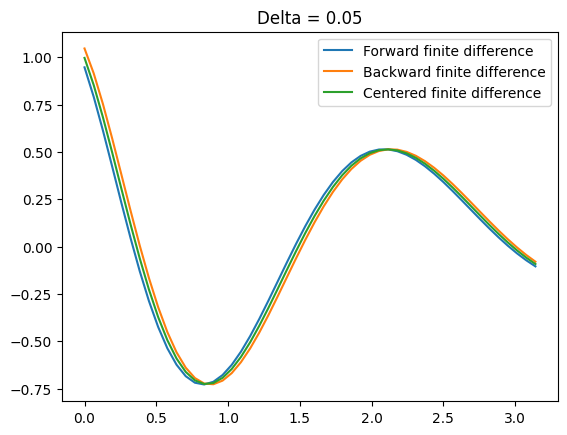

In [274]:
X = np.linspace(0, np.pi)
delta = 0.05
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, Func, delta)
    derF.append(f)
    derB.append(b)
    derC.append(c)

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.05")
plt.show()

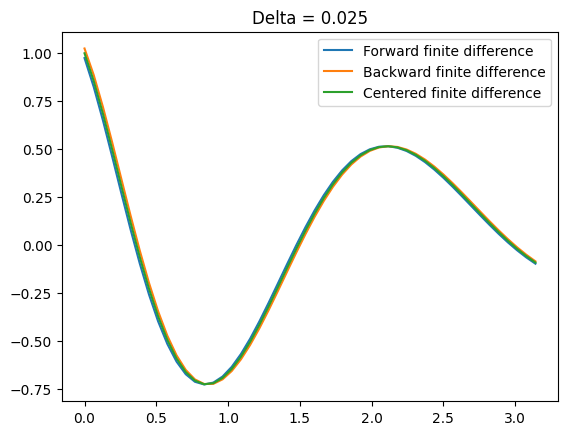

In [275]:
X = np.linspace(0, np.pi)
delta = 0.025
derF = []
derB = []
derC = []

for x in X:

    f, b, c = Cal_Der(x, Func, delta)
    derF.append(f)
    derB.append(b)
    derC.append(c)

plt.plot(X, derF, label="Forward finite difference")
plt.plot(X, derB, label="Backward finite difference")
plt.plot(X, derC, label="Centered finite difference")
plt.legend()
plt.title("Delta = 0.025")
plt.show()

### c)

Considerar o ponto $\overline x =\pi/2$. Calcular o erro das fórmulas nesse ponto para $(\delta_+ f)(\overline x)$ e $(\delta f)(\overline x)$, ou seja:

$$e(\overline x)=|f'(\overline x)-f'_a(\overline x)|$$

e plotar o resultado como função de $\delta$. Para isto tomar valores de $\delta = 0.25/10^k$ , $k = 0, 1, . . . , 10$. Usar a função loglog para plotar o erro em papel logarítmico. Que acontece quando  é muito pequeno?

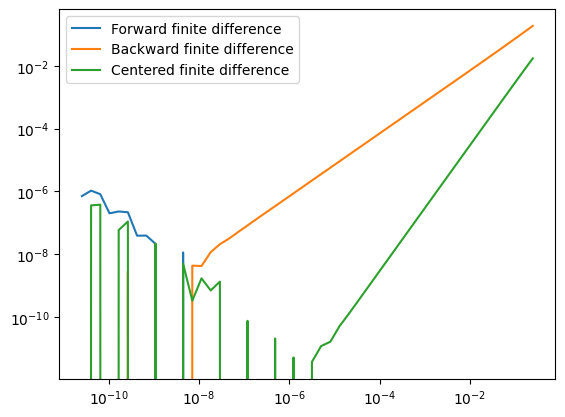

In [276]:
x_ = np.pi / 2
K = np.linspace(0, 10)
deltas = []
erroF_ = []
erroB_ = []
erroC_ = []

for k in K:
    delta = (0.25) / (10**k)
    deltas.append(delta)
    rF, rB, rC = Cal_Der(x_, Func, delta)

    erroF_.append(Der(x_) - rF)
    erroB_.append(Der(x_) - rB)
    erroC_.append(Der(x_) - rC)

plt.loglog(deltas, erroF_, label="Forward finite difference")
plt.loglog(deltas, erroB_, label="Backward finite difference")
plt.loglog(deltas, erroC_, label="Centered finite difference")
plt.legend()
plt.show()



Quando os $\delta$ são extremamente pequenos há uma perda de precisão.